One Class SVM (detect Novelty patern)

This approach is usual to detect rare events and is based the "density estimation" for the data. The Novelty corresponds the very low density samples

In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn import svm

In [93]:
# Load data from csv
file_path_1 = "./"
name_of_file_read = "gte01.csv" 

file_to_ready = file_path_1 + name_of_file_read

# read and show the raw data
data = pd.read_csv( file_to_ready, parse_dates=True)
print("data :  ", data.shape)
data.head(3)

data :   (186, 5)


,DT_REALIZ_VOO,COUNT,QT_PAX_CONEX_DOM,QT_PAX_CONEX_INT,QT_PAX_PAGANTE
0,01/06/2018,536,8568,2049,47212
1,02/06/2018,393,5087,2081,36401
2,03/06/2018,575,5962,2147,63133


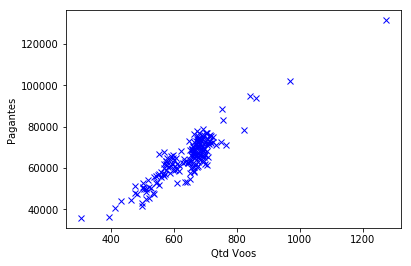

In [76]:
plt.figure()
plt.ylabel("Pagantes")
plt.xlabel("Qtd Voos")
plt.plot(data.COUNT,data.QT_PAX_PAGANTE,"bx")
plt.show()

In [91]:
data_svm = data.copy()
data_svm = data_svm.loc[:,["COUNT","QT_PAX_PAGANTE"]]

clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(data_svm)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

normal :   68
outliners :  118


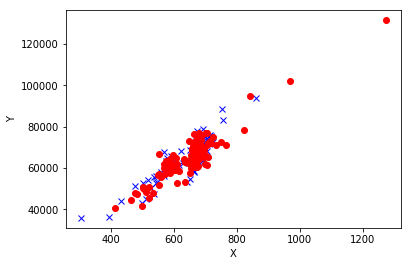

In [92]:
pred = clf.predict(data_svm)
normal = data_svm[pred == 1]
outliners = data_svm[pred == -1]

print("normal :  ", normal.shape[0])
print("outliners : ",outliners.shape[0])

plt.figure()
plt.plot(normal.COUNT,normal.QT_PAX_PAGANTE,'bx')
plt.plot(abnormal.COUNT,abnormal.QT_PAX_PAGANTE,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()